# Introduction

Throughout my data science journey, I have learned that it is a good practice to understand the data first and try to gather as many insights from it. Exploratory Data Analysis (EDA) is all about making sense of data in hand, before getting dirty with machine learning and sophiticated algorithm. 

While there are plenty of Python libraries that can help create beautiful and complex visualizations, I often find myself starting with the most simplistic analyses: count plot, histogram, scatter plot, boxplot, etc. This initial EDA workflow is very similar for each new data set. But unfortunately, they are tedious. Converting to correct data types, selecting the right variable type for the right plot, itterate through all possible variable combinations, adjusting plot asthetic and labels, etc. These are the tasks I would love to do... once. As someone that does not find great joy in completing repetitive tasks, I set out to build a tool that allow me to me as lazy as possible.

# Description
Auto_EDA is a python library that automates common tasks in your exploratory data analysis. This includes missing values visualization, missing values handling, variable types handling, predictive modeling and a variety of univariate and bivariate graphs. The goal is to provide a fast and effective tool for discovering insights, so you can quickly move on machine learning model.


# Table of Contents

## Descriptive Statistics

###  Dataset Overview

1. Number of variables

2. Number of observations

3. Memory usage

## Missing Values

1. Visualize missing values using heatmap

2. Suggestions for handling missing value

## Variable Types

1. Print out current data types from Pandas

2. Type conversion suggestions: 

 * String datetime -> datetime
 
 * Small interger (for example: boolean)  -> categorical type
 
 * String float -> float
 
 * Maximum cardinality (number of unique == number of observations) -> remove

## Visualization

### Univariate plots

1. Histogram (for numerical data)

2. Count plot (for categorical data)

3. World cloud (for text data)

### Bivariate plots 

User can specify a categorical column for grouping. 

1. Correlation plots (heat map and scatter plot): for numerical and numerical data
    * Principal Component Analysis

2. Box plots: for numerical and categorical data

3. Relative frequency plots: for categorical and categorical data
    * Correspondence Analysis

4. Trend plot (connected scatterplot): if timeseries data is present


### Statistical Modeling

User can specify a target variable for classification/regression task using Classification And Regression Tree (CART).

1. Classification Report (train on 75% of data, test on 25%)

2. Bar chart of relative feature importance

3. Decision tree visualization with Dtreeviz



In [1]:
from auto_eda import *

In [2]:
# Example dataset: air quality
# Testing datetime format and missing data handling
air_quality = pd.read_csv('datasets/AirQualityUCI_req.csv')
air_quality['Datetime'] = air_quality['Date'] + " " + air_quality['Time']
del air_quality['Date'], air_quality['Time']
air_quality['text_number'] = '3'
air_quality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,text_number
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,10/03/2004 18:00:00,3
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,10/03/2004 19:00:00,3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,10/03/2004 20:00:00,3
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,10/03/2004 21:00:00,3
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,10/03/2004 22:00:00,3


In [3]:
# Example dataset: Adult Income
# Test: categorical data
income = pd.read_csv('datasets/adult.csv')
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Example dataset: Adult Income
# Test: categorical data
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes['Outcome'] = np.where(diabetes['Outcome'] == 1, 'Heart Disease', 'No Heart Disease')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Heart Disease
1,1,85,66,29,0,26.6,0.351,31,No Heart Disease
2,8,183,64,0,0,23.3,0.672,32,Heart Disease
3,1,89,66,23,94,28.1,0.167,21,No Heart Disease
4,0,137,40,35,168,43.1,2.288,33,Heart Disease


In [5]:
# Example dataset: mtcars
# Test: categorical data
mtcars = pd.read_csv('datasets/mtcars.csv')

# Example dataset: edible mushroom classification
# Test: categorical data
mushroom = pd.read_csv('datasets/mushroom.csv')

# Example dataset: Heart Disease 
# Test: categorical data + numerical data
heart = pd.read_csv('datasets/heart.csv')
heart['target'] = np.where(heart['target'] == 1, 'has disease', 'no disease')

# Example dataset: California Housing 
# Test: regression
housing = pd.read_csv('datasets/housing.csv')

# Test: most
titanic = pd.read_csv('datasets/titanic.csv')
titanic['survived'] = np.where(titanic['survived'] == 1, 'survived', 'not-survived')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,survived,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,not-survived,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,not-survived,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,not-survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


## Dataset Overview



In [6]:
report = auto_eda(heart, target_variable = 'target')

In [7]:
report.get_samples()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,has disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,has disease
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,has disease
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,no disease
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,no disease
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,has disease
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,no disease
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,no disease
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,no disease


In [8]:
report.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [9]:
report.get_overview()

Number of Variables: 303
Number of Observations: 14
Memory Usage: 0.052106 Mb


## Missing Values

In [10]:
report.get_missings(missing_tag='?')

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


In [11]:
report.handle_missings(strategy = 'deletion', drop_threshold = 0.5)

There is no missing value in the dataset


In [12]:
report.get_missings()

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


## Variable Types

In [13]:
report.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,age,int64,41,None,no,yes,None
1,sex,int64,2,low_cardinality,no,yes,converts to object
2,cp,int64,4,low_cardinality,no,yes,converts to object
3,trestbps,int64,49,None,no,yes,None
4,chol,int64,152,high_cardinality,no,yes,None
5,fbs,int64,2,low_cardinality,no,yes,converts to object
6,restecg,int64,3,low_cardinality,no,yes,converts to object
7,thalach,int64,91,None,no,yes,None
8,exang,int64,2,low_cardinality,no,yes,converts to object
9,oldpeak,float64,40,None,no,yes,None


In [14]:
report.change_data_type()

Column sex converts to object
Column cp converts to object
Column fbs converts to object
Column restecg converts to object
Column exang converts to object
Column slope converts to object
Column ca converts to object
Column thal converts to object


In [15]:
report.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,age,int64,41,None,no,yes,None
1,sex,object,2,low_cardinality,no,yes,None
2,cp,object,4,low_cardinality,no,yes,None
3,trestbps,int64,49,None,no,yes,None
4,chol,int64,152,high_cardinality,no,yes,None
5,fbs,object,2,low_cardinality,no,yes,None
6,restecg,object,3,low_cardinality,no,yes,None
7,thalach,int64,91,None,no,yes,None
8,exang,object,2,low_cardinality,no,yes,None
9,oldpeak,float64,40,None,no,yes,None


## Visualization

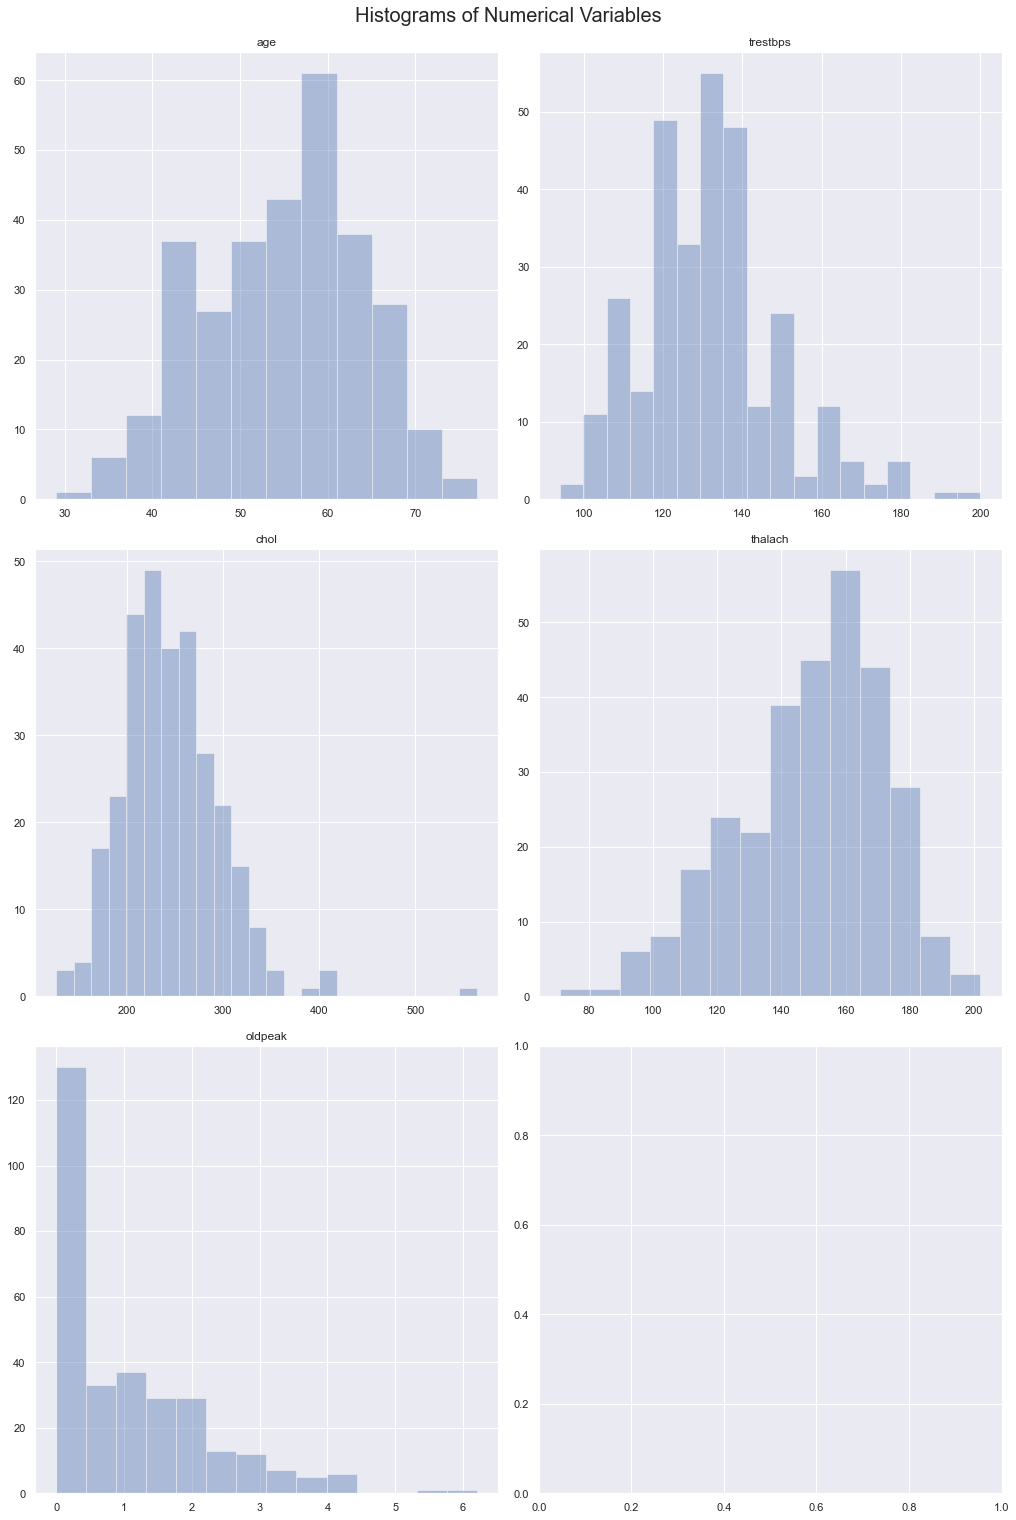

In [16]:
report.histogram()
# plt.savefig("histogram.png")

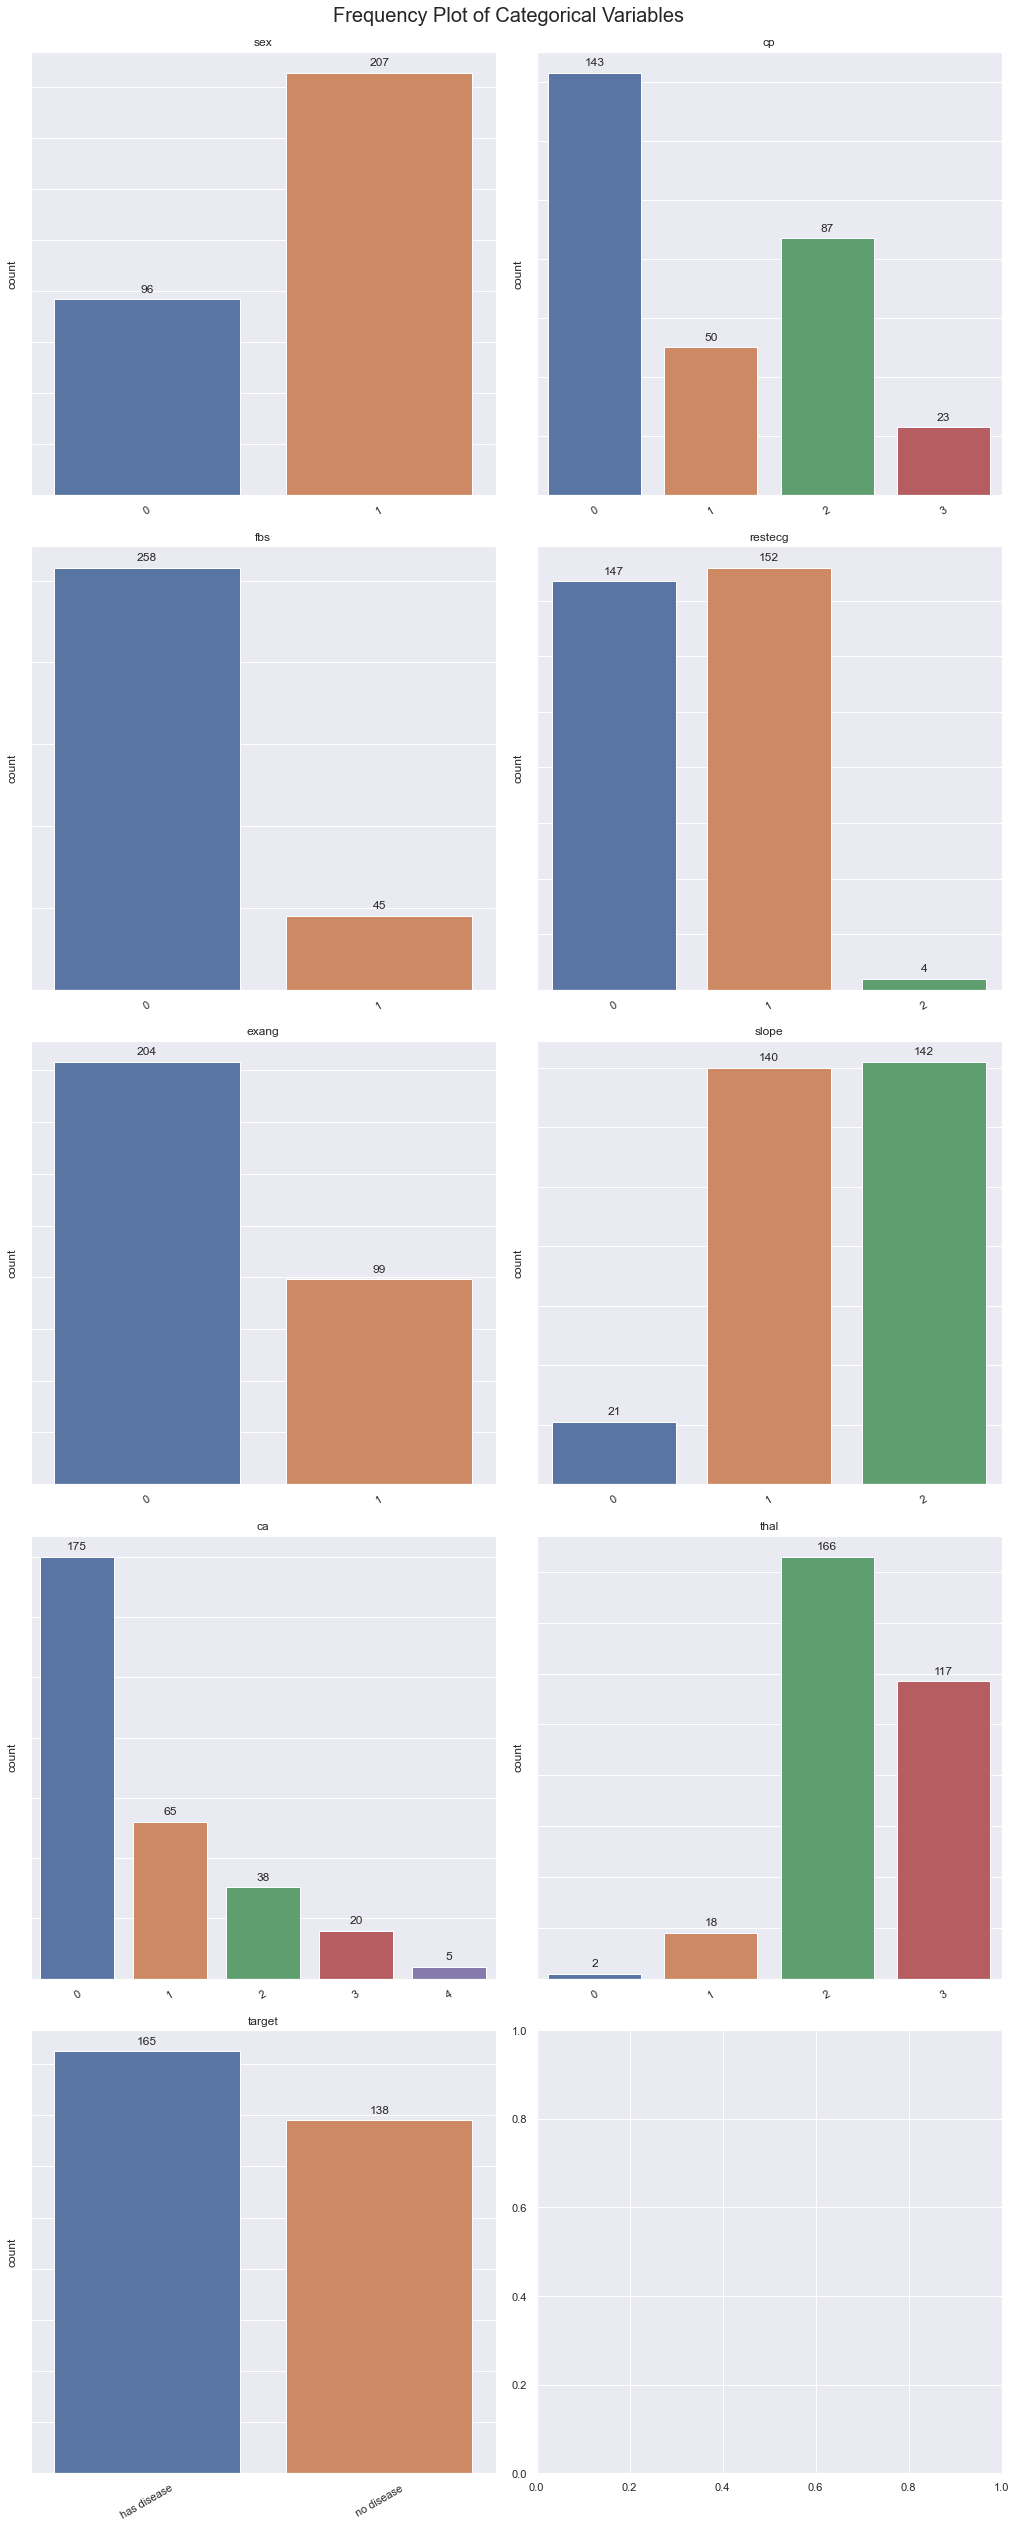

In [17]:
report.count_plots()

# plt.savefig("count_plots.png")

## Bivariate plots

### Correlation Plots

,age,trestbps,chol,thalach,oldpeak
age,1.00,0.28,0.21,-0.40,0.21
trestbps,0.28,1.00,0.12,-0.05,0.19
chol,0.21,0.12,1.00,-0.01,0.05
thalach,-0.40,-0.05,-0.01,1.00,-0.34
oldpeak,0.21,0.19,0.05,-0.34,1.00


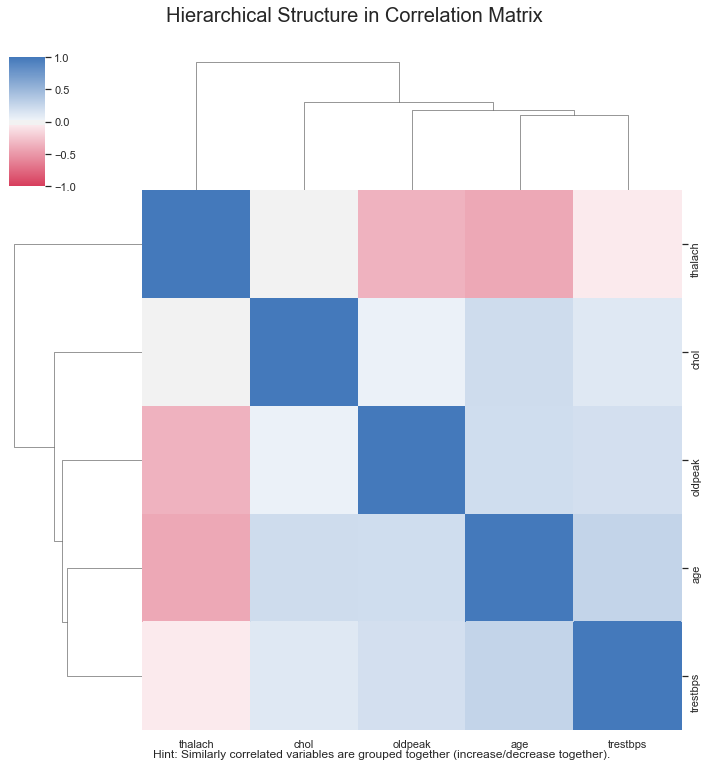

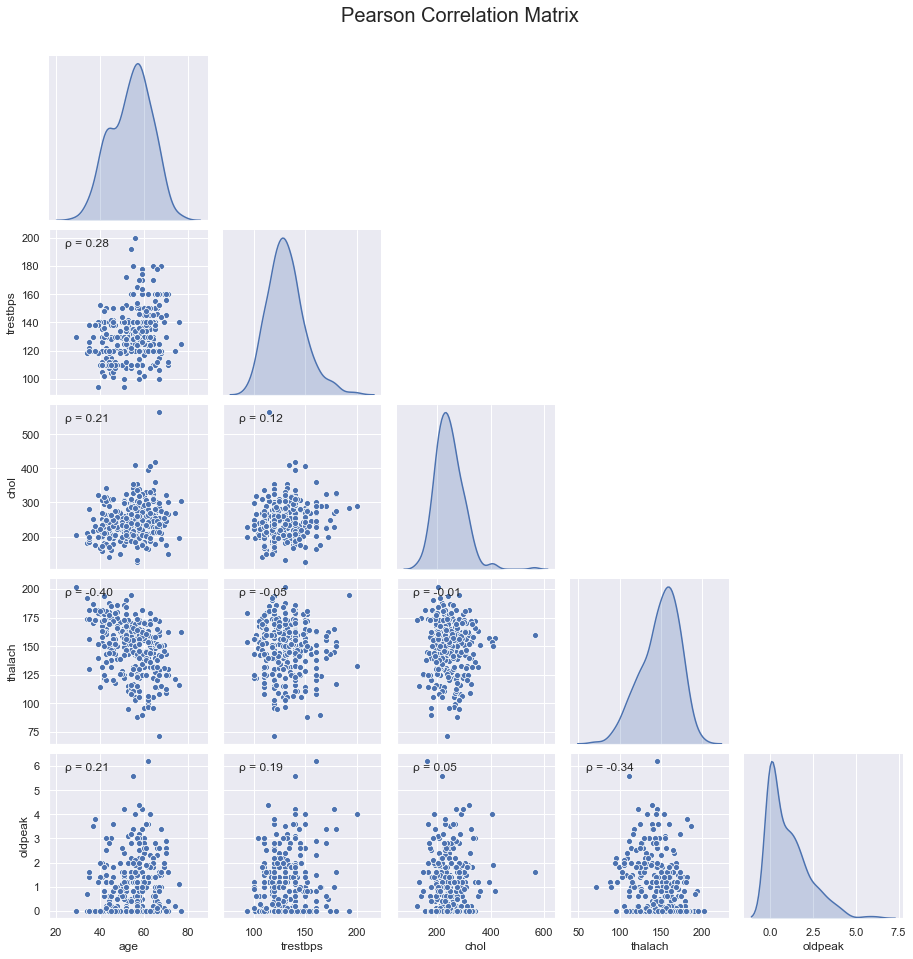

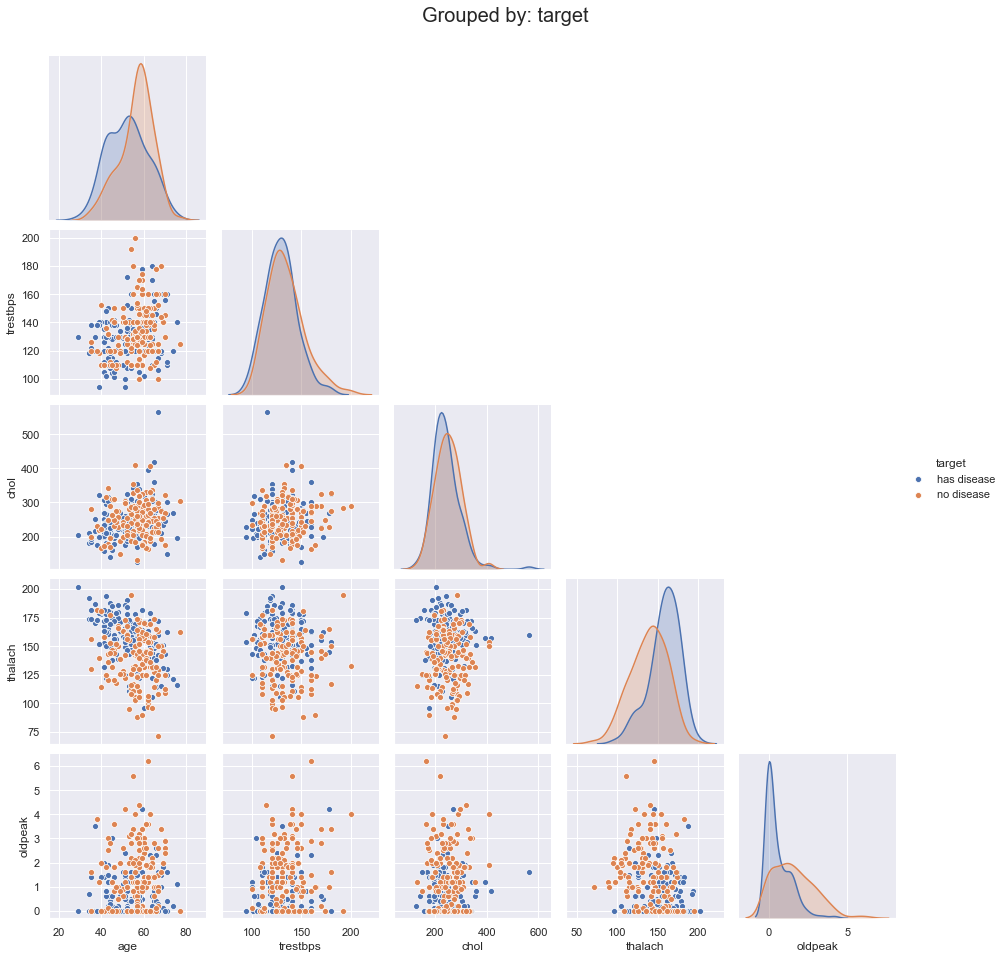

In [18]:
report.correlation()

### PCA plot

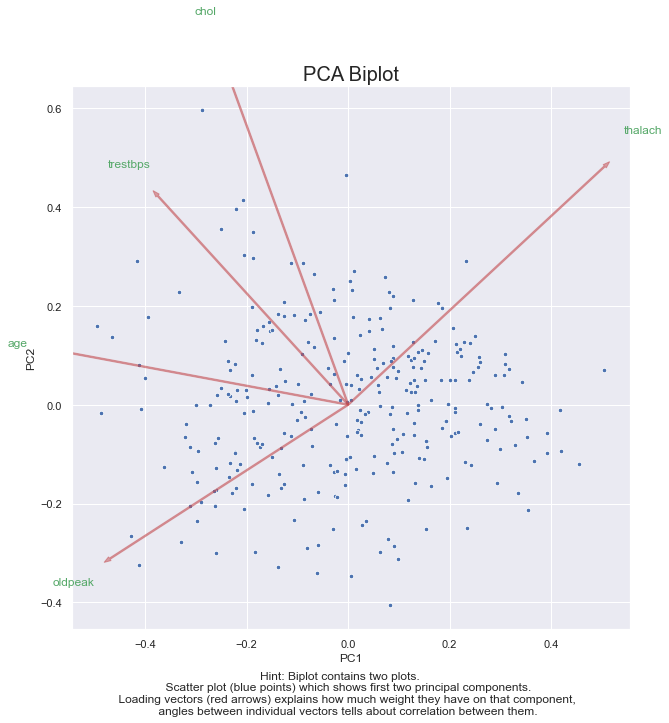

In [19]:
report.pca()

# plt.savefig("pca.png")

### Boxplots

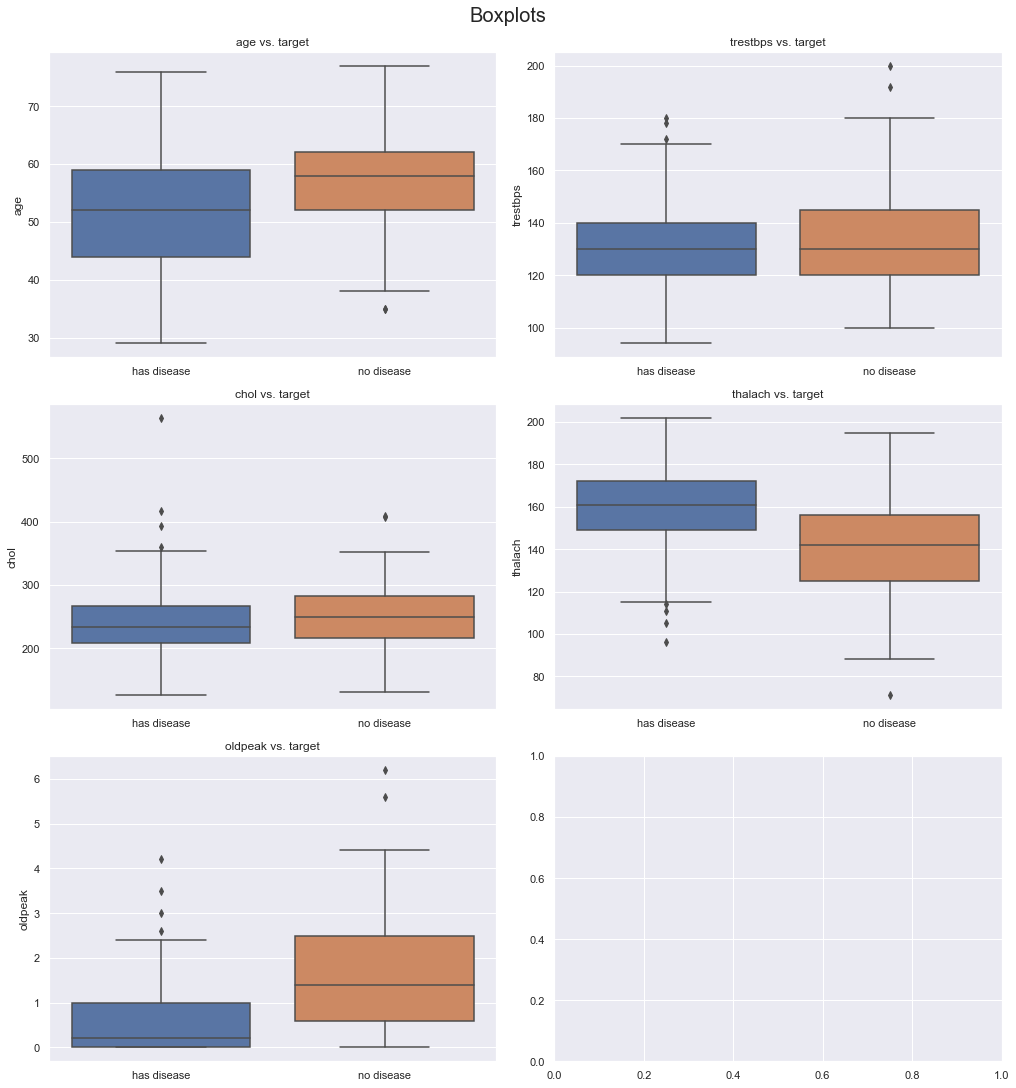

In [20]:
report.boxplots()

# plt.savefig("boxplots.png")

### Relative Frequency Plots

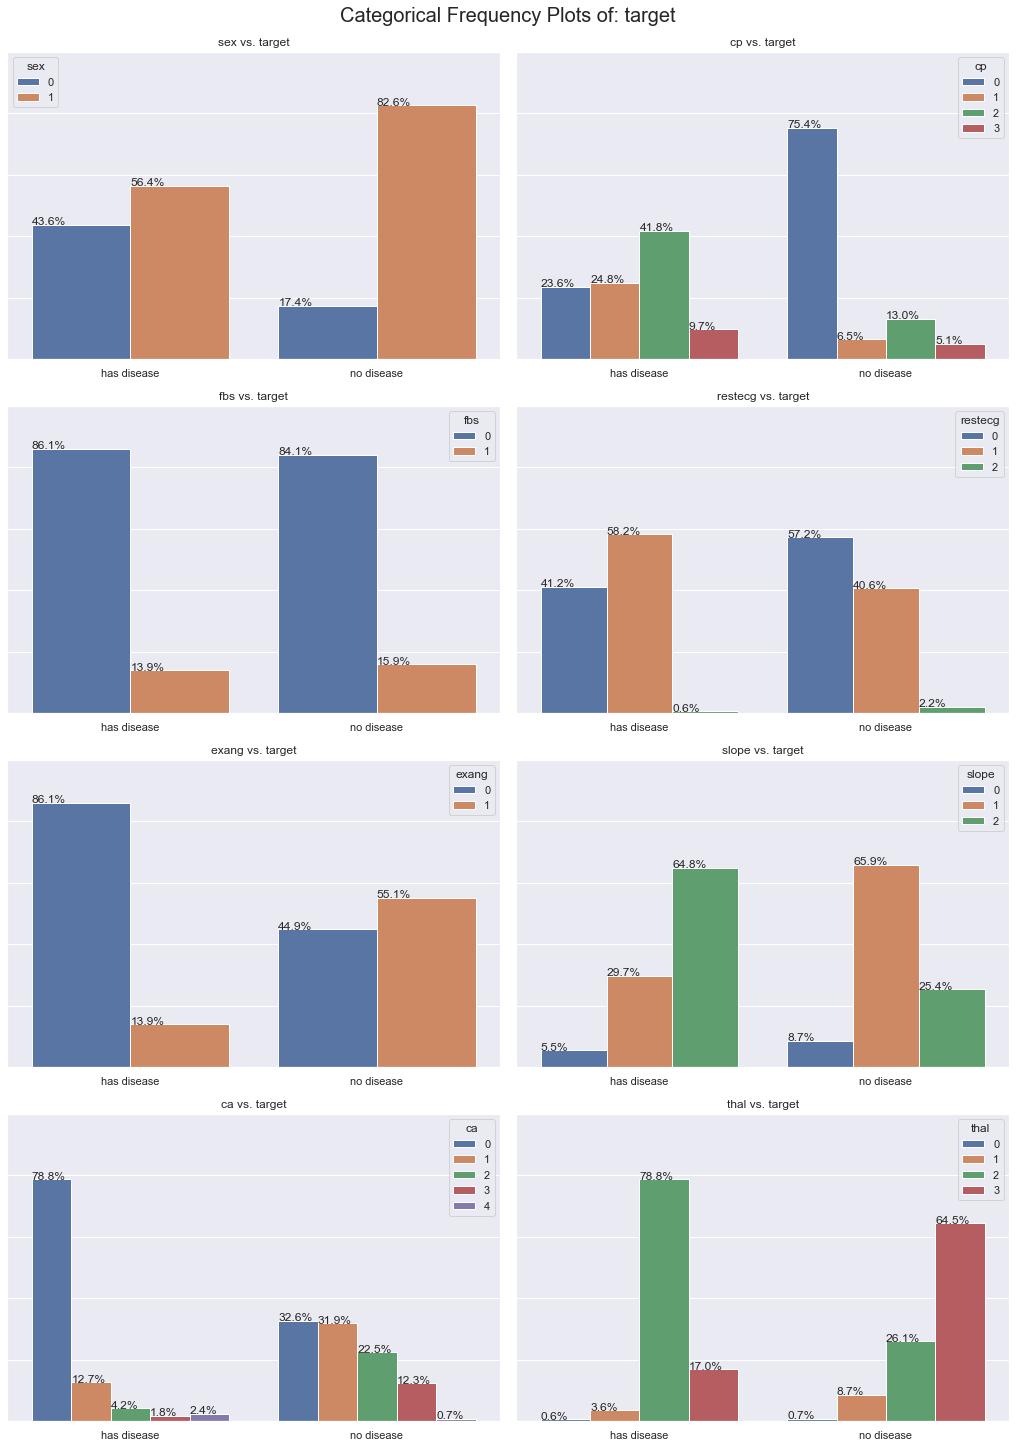

In [21]:
report.cat_plots()

# plt.savefig("cat_plots.png")

### Timeseries plot 

In [22]:
report.timeseries_plots(grouper = 'M')

No datetime column detected. Make sure datetime64 type exist.


### Correspondence Analysis

In [ ]:
report.correspondence_analysis()

# plt.savefig("correspondence_analysis.png")

### Decision Tree Visualizer

In [ ]:
report.tree_model(max_depth = 4)

# plt.savefig("tree_model.png")